In [1]:

import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
#from pyextremes import get_extremes, get_return_periods
%matplotlib inline  
#from pyextremes.eva import EVA
from windrose import WindroseAxes


In [2]:
url1 = "../modified_44020_mean_waves.csv"
url2 = "../Hs.csv"

In [3]:
data = (
    pd
    .read_csv(url1, index_col=0, parse_dates=True)
    .sort_index(ascending=True)
    .astype(float)
    .dropna()
)
data.head()

#wave_heights=data["Hs"]

,latitude,longitude,meanWaveDirection
time,,,
2009-04-15 05:50:00,41.44,-70.19,86.0
2009-04-15 06:50:00,41.44,-70.19,89.0
2009-04-15 07:50:00,41.44,-70.19,83.0
2009-04-15 08:50:00,41.44,-70.19,90.0
2009-04-15 09:50:00,41.44,-70.19,80.0


In [4]:
df1 = pd.read_csv(url1)
df1

,time,latitude,longitude,meanWaveDirection
0,2009-04-14 18:50:00,41.440000,-70.190000,NaN
1,2009-04-14 19:50:00,41.440000,-70.190000,NaN
2,2009-04-14 20:50:00,41.440000,-70.190000,NaN
3,2009-04-14 21:50:00,41.440000,-70.190000,NaN
4,2009-04-14 22:50:00,41.440000,-70.190000,NaN
...,...,...,...,...
370113,2024-03-31 23:30:00,41.497101,-70.283302,NaN
370114,2024-03-31 23:40:00,41.497101,-70.283302,257.0
370115,2024-03-31 23:40:00,41.497101,-70.283302,257.0
370116,2024-03-31 23:50:00,41.497101,-70.283302,NaN


In [5]:
data2 = (
    pd
    .read_csv(url2, index_col=0, parse_dates=True)
    .sort_index(ascending=True)
    .astype(float)
    .dropna()
)
data2.head()

,latitude,longitude,waveHs
time,,,
2009-04-14 18:50:00,41.44,-70.19,0.14
2009-04-14 19:50:00,41.44,-70.19,0.19
2009-04-14 20:50:00,41.44,-70.19,0.20
2009-04-14 21:50:00,41.44,-70.19,0.18
2009-04-14 22:50:00,41.44,-70.19,0.16


In [6]:
df2 = pd.read_csv(url2)
df2

,time,latitude,longitude,waveHs
0,2009-04-14 18:50:00,41.440000,-70.190000,0.14
1,2009-04-14 19:50:00,41.440000,-70.190000,0.19
2,2009-04-14 20:50:00,41.440000,-70.190000,0.20
3,2009-04-14 21:50:00,41.440000,-70.190000,0.18
4,2009-04-14 22:50:00,41.440000,-70.190000,0.16
...,...,...,...,...
370113,2024-03-31 23:30:00,41.497101,-70.283302,-999.00
370114,2024-03-31 23:40:00,41.497101,-70.283302,0.53
370115,2024-03-31 23:40:00,41.497101,-70.283302,0.53
370116,2024-03-31 23:50:00,41.497101,-70.283302,NaN


In [7]:
# Convert 'Date' column to datetime type for both dataframes
df2['time'] = pd.to_datetime(df2['time'])
df1["time"] = pd.to_datetime(df1["time"])
#wave_direction_df['Date'] = pd.to_datetime(wave_direction_df['Date'])

In [8]:

# Remove rows with NaNs in wave direction data
df1 = df1.dropna(subset=['meanWaveDirection'])

# Filter wave heights above a threshold of 2m
threshold = 0.0
df2 = df2[df2['waveHs'] > threshold]

In [9]:
print(len(df2))

138365


In [10]:

# Get unique dates from wave direction data
#wave_direction_dates = df1['time'].unique()

# Filter wave height data to only include dates where wave direction data is present
#filtered_wave_height_df1 = df2[df2['time'].isin(wave_direction_dates)]

# Find common wave direction dates
common_dates = pd.merge(df2, df1, on='time')


In [11]:

# Plot wave energies as bars
wave_directions = common_dates['meanWaveDirection'] * np.pi / 180
wave_energies = common_dates['waveHs']

In [12]:
# Print the filtered wave height data
print(len(wave_directions))
print(len(wave_energies))

115245
115245


In [13]:
# only take data from the dates that we have wave direction data for wave height 
print(wave_energies)

0         0.28
1         0.42
2         0.67
3         0.73
4         0.75
          ... 
115240    0.46
115241    0.53
115242    0.53
115243    0.53
115244    0.53
Name: waveHs, Length: 115245, dtype: float64


In [14]:
# Sample wave data (directions in degrees, energies in arbitrary units)
#wave_directions = np.array([0, 45, 90, 135, 180, 225, 270, 315])
#wave_energies = np.array([10, 20, 15, 30, 25, 12, 18, 22])

# Create a wave rose plot
#plt.figure(figsize=(8, 8))
#ax = plt.subplot(111, polar=True)
#ax.bar(wave_directions, wave_energies, width=np.pi / 8)
#ax.set_theta_zero_location('N')  # Set north as the zero direction
#ax.set_theta_direction(-1)  # Set clockwise direction
#ax.set_title('Wave Rose Plot', va='bottom')
#ax.set_xlabel('Wave height (m)')
#plt.show()

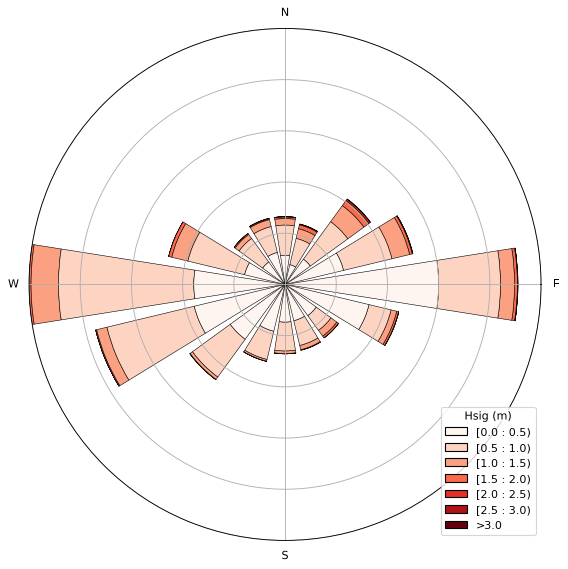

In [15]:
import matplotlib.cm as cm
from matplotlib import patheffects

# setting wave height bins, colour, and other plot settings.
ax = WindroseAxes.from_ax()

#plt.figure(figsize=(8, 8))
#ax = plt.subplot(111, polar=True)
ax.bar(wave_directions*180.0/(np.pi), wave_energies, bins=np.arange(threshold, 3.5, 0.5), cmap=cm.Reds, edgecolor='black', linewidth=0.5, normed=True)
#x.bar(wave_directions, wave_energies, width=np.pi / 8, color='skyblue', alpha=0.7)

# Define the formatter function (percent label)
#def percentage(x, pos):
#    return '{:.0f}%'.format(x * 1)

# Apply the formatter function to both x and y axes and adjust font size
#ax.yaxis.set_major_formatter(ticker.FuncFormatter(percentage))
ax.yaxis.set_tick_params(labelsize=10)
#ax.xaxis.set_major_formatter(ticker.FuncFormatter(percentage))
ax.xaxis.set_tick_params(labelsize=10)
#ax.grid(color='k', linewidth=0.3)

#%labels
#theLabels = ['', '10%', '20%', '30%', '40%', '50%']
#ax.set_rgrids(np.arange(0, 60, 10), angle=0, labels=theLabels, fontsize=22)
#ax.set_rlabel_position(45)

# Set the font size of the legend labels and position  
legend = ax.legend(title='Hsig (m)', loc='lower right', fontsize='10')
#legend.get_title().set_fontsize(10)
#for label in legend.get_lines():
#    label.set_linewidth(2.0)
    
# Apply white halo effect to x and y axis labels
for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_path_effects([patheffects.withStroke(linewidth=3, foreground="w")])

# Apply white halo effect to the legend title and labels
for label in (legend.get_lines() + [legend.get_title()]):
    label.set_path_effects([patheffects.withStroke(linewidth=3, foreground="w")])

#set NSEW labels
#ax.set_xticklabels([ '', '', 'N', '', '', '', '', ''], fontweight='bold', fontsize=12)
ax.set_thetagrids([0, 90, 180, 270], ['E', 'N', 'W', 'S'])
# Remove normed values from y-axis labels
yticks = ax.get_yticks()
yticklabels = [''] * len(yticks)
ax.set_yticks(yticks)
ax.set_yticklabels(yticklabels)
#plot and save the figure
plt.savefig(f'Hs_wavedir_{threshold}.png',dpi=500)#, transparent=True)
